---

<img src="../06_RESOURCES/books_data_analysis.png" alt="books_data_analysis-picture" height=500px>

---

# Books Data Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quantumudit/Analyzing-Books/blob/master/04_ANALYSIS/books_data_analysis.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/quantumudit/Analyzing-Books/blob/master/04_ANALYSIS/books_data_analysis.ipynb)

## Introduction

In this notebook, we'll be leveraging the clean dataset for data analysis and data visualization.

Earlier, we have performed web scraping to get the data from [Books to Scrape](https://books.toscrape.com/) website and performed required transformations and data cleaning in the [Data Transformation Notebook](../02_ETL/books_data_transformation.ipynb) to create a clean dataset for analysis.

During the ETL process, we have also uncovered patterns and relationships within the dataset that will help us in analyzing the data and get insights out of it.

## Imports & Setup

In the section, we will be importing the necessary libraries for data analysis and visualization in the books dataset.

This will include popular data analysis libraries such as `pandas` and `numpy`, as well as visualization libraries like `matplotlib` and `seaborn`. Additionally, we will also be loading the cleaned books dataset and will be importing it into the notebook.

Moreover, we will also be setting any necessary configurations or options that will be used throughout the notebook.

### Module Import & Setup

We will be importing the following libraries and modules:

- `pandas`: for loading, manipulating, and analyzing the dataset
- `numpy`: for performing numerical operations on the dataset
- `matplotlib` and `seaborn`: for creating visualizations and plots of the data
- `warnings`: for handling any warning that may occur during the execution of the code

We will also be setting any necessary configurations or options that will be used throughout the notebook, such as setting the plotting style for `matplotlib` or setting the display options for `pandas` dataframes. In addition, we'll be ignoring any warning that may appear during the execution of the notebook.

We are also importing helper functions from the **"helper_functions.py"** file that includes various functions help us to keep our code organized and reusable.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# import helper functions
from helper_functions import dataframe_structure, dict_to_table, datatype_details, describe_object_fields

# module setup
%matplotlib inline
pd.options.display.precision = 5
warnings.filterwarnings("ignore")

### Data Import

Now, we will be importing the clean books dataset from the directory using the `pandas` library. The `read_csv()` method is used to get the data from the CSV file. Moreover, we'll making a deep copy of the dataframe for working.

In [2]:
# import data from csv
original_books_df = pd.read_csv("../03_DATA/books_data.csv")

# create a copy of it for working
books = original_books_df.copy(deep=True)

# view the glimpse of the dataframe
books.head()

,BookID,Title,Genre,Price (£),Rating,Stock Availability Status,Cover Page,Last Update Timestamp (UTC)
0,B1000,It's Only the Himalayas,Travel,45.17,2,Yes,https://books.toscrape.com/media/cache/27/a5/2...,18-Jun-2022 19:04:35
1,B1001,Full Moon over Noah’s Ark: An Odyssey to Mount...,Travel,49.43,4,Yes,https://books.toscrape.com/media/cache/57/77/5...,18-Jun-2022 19:04:35
2,B1002,See America: A Celebration of Our National Par...,Travel,48.87,3,Yes,https://books.toscrape.com/media/cache/9a/7e/9...,18-Jun-2022 19:04:35
3,B1003,Vagabonding: An Uncommon Guide to the Art of L...,Travel,36.94,2,Yes,https://books.toscrape.com/media/cache/d5/bf/d...,18-Jun-2022 19:04:35
4,B1004,Under the Tuscan Sun,Travel,37.33,3,Yes,https://books.toscrape.com/media/cache/98/c2/9...,18-Jun-2022 19:04:35


### Metadata Information

In this section, we'll be describing each field present in our dataset, providing insight into the information contained within each field. This information is crucial in helping us understand the structure of our data, and ensuring that we are able to effectively clean and transform it in preparation for analysis and visualization. Here's a breakdown of the fields contained within our dataset:

- **BookID** : Unique ID for each book
- **Title** : Title of the book
- **Genre** : Genre of the book
- **Price (£)** : Price of the book in Euros(£)
- **Rating** : Rating of book out of 5
- **Stock Availability Status** : Availability status of the book
- **Cover Page** : Image URL of the book
- **Last Update Timestamp (UTC)** : Latest UTC timestamp of item scraped

### Renaming Columns

Now, we will be cleaning and formatting the column names of the dataframe. This will include removing any special characters or spaces, and converting the column names to snake case. This step is important as it will make the column names consistent and easy to work with, and also it will make the code more readable.

In [3]:
# fixing column names
cols = ["book_id", "title", "genre", "price", "rating", "stock_availability", "cover_page", "last_updated"]
books.columns = cols

# view the column names in the dataframe
print(books.columns)

Index(['book_id', 'title', 'genre', 'price', 'rating', 'stock_availability',
       'cover_page', 'last_updated'],
      dtype='object')


In [4]:
# view glimpse of data
books.head()

,book_id,title,genre,price,rating,stock_availability,cover_page,last_updated
0,B1000,It's Only the Himalayas,Travel,45.17,2,Yes,https://books.toscrape.com/media/cache/27/a5/2...,18-Jun-2022 19:04:35
1,B1001,Full Moon over Noah’s Ark: An Odyssey to Mount...,Travel,49.43,4,Yes,https://books.toscrape.com/media/cache/57/77/5...,18-Jun-2022 19:04:35
2,B1002,See America: A Celebration of Our National Par...,Travel,48.87,3,Yes,https://books.toscrape.com/media/cache/9a/7e/9...,18-Jun-2022 19:04:35
3,B1003,Vagabonding: An Uncommon Guide to the Art of L...,Travel,36.94,2,Yes,https://books.toscrape.com/media/cache/d5/bf/d...,18-Jun-2022 19:04:35
4,B1004,Under the Tuscan Sun,Travel,37.33,3,Yes,https://books.toscrape.com/media/cache/98/c2/9...,18-Jun-2022 19:04:35


With the successful import of data and libraries, we can now proceed to the data profiling stage to make necessary changes for analysis and pattern visualization.

## Data Profiling

In this section, we will perform a detailed analysis of our dataset to understand the characteristics and properties of our data. 

This will include a general overview of the data, descriptive statistics for numerical columns, frequency tables and histograms for categorical and numerical columns, and identifying any null values or, outliers in the data. 

This will give us a comprehensive understanding of the data and help us identify any potential issues or inconsistencies, which will inform our decisions on how to proceed with the analysis and modeling.

The data profiling consists of the following anaysis of the data:

- **Data Structure Analysis**: Examining the data structure such as number of columns, data types, null values, and duplicates.
- **Data Quality Analysis**: Checking for inconsistencies, errors, or missing data. This can include identifying missing values, duplicate records, and outliers.
- **Data Distribution Analysis**: Examining the distribution of data across different columns, such as the number of unique values, the range of values, and the frequency of different values.
- **Data Relationships Analysis**: Identifying relationships between different columns, such as correlation, co-occurrence, or mutual information.

### Data Structure Analysis

This section is devoted to an initial exploration of the structure of our dataframe. Our focus will be on various aspects of the dataframe, such as the number of columns, presence of null values, shape, and attributes of the individual fields within the dataframe. The goal of this analysis is to identify any potential challenges or issues that may arise during further analysis.

We can break down our exploration into two parts:

- **Dataframe Overview**: To gain an understanding of overall dataframe attributes
- **Field Attributes**: To examine the attributes of individual fields within the dataframe

With this framework in mind, let's proceed with a closer look at the structure of our dataframe.

### Dataframe Details

This section is a cruicial one and it provides a high-level overview of the dataframe being analyzed. This section includes important information about the size and structure of the data, as well as any missing or null values in the data. The details of the dataframe that we'll get are as follows:

- **Dimensions**: The number of rows and columns in the dataframe.
- **Shape**: The shape of the dataframe, represented as a tuple (rows, columns).
- **Row Count**: The number of rows in the dataframe.
- **Column Count**: The number of columns in the dataframe.
- **Total Datapoints**: The total number of data points in the dataframe, calculated as the number of rows multiplied by the number of columns.
- **Null Datapoints**: The number of missing or null values in the dataframe.
- **Non-Null Datapoints**: The number of non-missing or non-null values in the dataframe.
- **Total Memory Usage**: The total memory usage of the dataframe, represented in bytes.
- **Average Memory Usage**: The average memory usage of each data point in the dataframe, represented in bytes.

This section provides a quick reference for the dataframe, and helps to identify any potential issues with the data that may need to be addressed in the cleaning process. By having a clear and concise overview of the dataframe, it's easier to move forward with the data cleaning and analysis process.

In [5]:
# get the dataframe structure details
df_structure = dataframe_structure(dataframe=books)

# prettify the dictionary response
tbl = dict_to_table(input_dict=df_structure,
                    column_headers=["Dataframe Attributes", "Value"])

# show table
print(tbl)

+----------------------+-----------+
| Dataframe Attributes | Value     |
+----------------------+-----------+
| Dimensions           | 2         |
| Shape                | (1000, 8) |
| Row Count            | 1000      |
| Column Count         | 8         |
| Total Datapoints     | 8000      |
| Null Datapoints      | 0         |
| Non-Null Datapoints  | 8000      |
| Total Memory Usage   | 516486    |
| Average Memory Usage | 57387.0   |
+----------------------+-----------+


💡 **Insights:**

The dataframe has $2$ dimensions and a shape of ($1000$, $8$), meaning it has $1000$ rows and $8$ columns.<br>
The dataframe has a total of $8000$ data points, with no null data points. The total memory usage of the dataframe is $5,16,486$ bytes and the average memory usage per column is $57,387$ bytes.

### Field Details

This section provides a detailed view of the columns in the dataframe, and includes important information that can help with the data cleaning and analysis process. This section is typically used to get an understanding of the data types and distributions of the columns, and to identify any missing or null values that may need to be addressed.

We can use the `info()` method in `pandas` to quickly get an understanding of the structure and distribution of the data, and identify any issues that may need to be addressed in the cleaning process.

Additionally, we'll use the function `datatype_details()` defined in the [helper_functions.py](./helper_functions.py) file to get a datatype details of the dataframe.

Some of the key information that we'll get from this section are as follows:

- **Column Names**: A list of the names of all the columns in the dataframe, which can help you to identify any columns that may need to be renamed for clarity or consistency.
- **Datatypes**: The datatype of each column in the dataframe, such as integer, float, string, etc. The datatype information is important because it determines how the data can be analyzed and manipulated.
- **Non-Null Count**: The number of non-null or non-missing values for each column in the dataframe. This information can help you to determine if there are any columns that have a high percentage of missing values, which may need to be handled differently in the cleaning process.
- **Null Count**: The number of null or missing values for each column in the dataframe. This information can help you to determine if there are any columns that have a high number of missing values, which may need to be handled differently in the cleaning process.
- **Memory Usage**: The memory usage of each column in the dataframe, represented in bytes. This information can be useful in determining if there are any columns that are using a large amount of memory, which may need to be optimized for performance.

In [6]:
# get field details
books.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_id             1000 non-null   object 
 1   title               1000 non-null   object 
 2   genre               1000 non-null   object 
 3   price               1000 non-null   float64
 4   rating              1000 non-null   int64  
 5   stock_availability  1000 non-null   object 
 6   cover_page          1000 non-null   object 
 7   last_updated        1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 504.4 KB


In [7]:
# get details of teh datatypes
datatype_details(books)

There are 1 fields with int64 datatype
There are 6 fields with object datatype
There are 1 fields with float64 datatype


💡 **Insight:**

Based on the above results, it appears that the dataframe has $8$ columns and none of the columns have missing values. This is a positive indication that the data is relatively clean and ready for further analysis. However, it is always good to double check the data and perform some exploratory data analysis to make sure that there are no other issues with the data.

We also found that our dataset has $6$ object type data field, $1$ integer and $1$ float type data field. The `rating` is actually a categorical field but, we might need to see the average rating by genre or, status and therefore, we'll keep it as integer type only.

It's important to keep in mind that even though the data appears to be clean and ready for analysis, it's always a good idea to perform some exploratory data analysis to gain a deeper understanding of the data and identify any patterns or trends that may be useful for further analysis.

### Data Quality Analysis

The purpose of this section is to evaluate the overall quality of the data by checking for any missing or null values, duplicate entries, and any other potential issues that may impact the accuracy or reliability of our analysis. 

This step is crucial in ensuring that the data we are working with is valid and can be used to draw meaningful conclusions. We will also be identifying and addressing any issues that are found, in order to improve the overall quality of the data.

From our data structure analysis, we found that there are no empty/null values in the dataset, therefore, there is no point to check for null values in the columns. 

Now, we need to perform the following two checks on the dataset:

- **Removal of Unnecessary Columns**: To eleminate irrelevant columns from the dataset.
- **Duplicated Entry Checks**: To identify and remove duplicate rows in the dataset.
- **Unique Value Checks**: To verify the uniqueness of values in specific columns of the dataset.

#### Removal of Unnecessary Columns

In this section, we will be removing three columns from the data set: `book_id`, `cover_page`, and `last_updated`. These columns are considered unnecessary for the purpose of our analysis and do not provide any meaningful insights. By removing these columns, we will simplify the data set and make it easier to work with.

To remove these columns, we will be using the `drop()` function in `pandas` that helps tp remove one or multiple columns from the dataframe.

In [8]:
# list of columns to drop
cols_to_remove = ["book_id", "cover_page", "last_updated"]

# drop the columns
books = books.drop(columns = cols_to_remove)

# view glimpse of the data
books.head()

,title,genre,price,rating,stock_availability
0,It's Only the Himalayas,Travel,45.17,2,Yes
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,Travel,49.43,4,Yes
2,See America: A Celebration of Our National Par...,Travel,48.87,3,Yes
3,Vagabonding: An Uncommon Guide to the Art of L...,Travel,36.94,2,Yes
4,Under the Tuscan Sun,Travel,37.33,3,Yes


#### Duplicated Entry Checks

Now, we will be analyzing the dataframe for any duplicate entries. This will involve identifying and removing any duplicate rows in the dataframe to ensure that our data is clean and accurate. This step is important as duplicate data can lead to inaccurate or misleading results in our analysis. We will be using pandas inbuilt methods to check for duplicate rows and remove them as necessary.

In [9]:
# create boolean mask to get duplicated entries
dup_mask = books.duplicated()

# apply the mask over dataframe
dup_entries = books[dup_mask]

# results
print(f"There are {len(dup_entries)} duplicated entries in the dataframe")

There are 0 duplicated entries in the dataframe


💡 **Insight**

So, the dataframe does not contain any duplicate rows, indicating that the data is clean and unique. This is a positive finding and suggests that there is no need to further process the data to remove duplicate entries.

#### Unique Value Checks

In this section, we will be checking the number of unique values present in each object type column in the data set. Object type columns are those columns in the data set that contain string values, as opposed to numerical or boolean values. 

This check is important as it helps us understand the diversity of the data in each column and helps us identify columns that may contain redundant or irrelevant information.

To perform this check, we will use the `nunique()` method in `pandas`, which returns the number of unique values in a column.

In [10]:
for col in books.select_dtypes('object').columns:
    unq_vals = books[col].nunique()
    print(f"The {col} contains {unq_vals} unique values")

The title contains 999 unique values
The genre contains 50 unique values
The stock_availability contains 1 unique values


💡 **Insight:**

Based on our findings:

- The `title` column contains $999$ unique values, indicating a diverse range of book titles in the data set. This diversity is expected as books can belong to different genres and have different authors, publication dates, and so on.

- The `genre` column contains $50$ unique values, which suggests that there are $50$ different genres represented in the data set. This can provide valuable information about the types of books available on the website.

- The `stock_availability` column contains only $1$ unique value, indicating that all the books in the data set are either in stock or not in stock. This information can be useful for the website to manage its stock and ensure that popular books are always in stock.

So, there are $999$ unique books out of $1000$ rows of data. That's interesting. Let's find out the book that is present for $2$ times.

In [11]:
# books whose titles are same

duplicated_book = books[books['title'].duplicated(keep=False)]
duplicated_book

,title,genre,price,rating,stock_availability
700,The Star-Touched Queen,Fantasy,46.02,5,Yes
707,The Star-Touched Queen,Fantasy,32.30,5,Yes


So, it seems the book is present $2$ times in the same genre (Fantasy) but, with $2$ different prices. We can see the details of these $2$ books here:
- [The Star-Touched Queen (Price: £46.02)](https://books.toscrape.com/catalogue/the-star-touched-queen_764/index.html)
- [The Star-Touched Queen (Price: £32.30)](https://books.toscrape.com/catalogue/the-star-touched-queen_642/index.html)

Since, there is just $1$ unique value in the `stock_availabilty` status; it's not going to be very helpful in the analysis and thus, we can remove this field. However, let's check what is that unique value we have

In [12]:
print(books['stock_availability'].unique())

['Yes']


The only value present in the `stock_availability` column is `yes` that means all the books in the data set in stock. <br>
Now, let's remove this column from the dataset.

In [13]:
# drop the columns
books = books.drop(columns = "stock_availability")

# view glimpse of the data
books.head()

,title,genre,price,rating
0,It's Only the Himalayas,Travel,45.17,2
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,Travel,49.43,4
2,See America: A Celebration of Our National Par...,Travel,48.87,3
3,Vagabonding: An Uncommon Guide to the Art of L...,Travel,36.94,2
4,Under the Tuscan Sun,Travel,37.33,3


### Data Distribution Analysis

In this section, we will examine the distribution of data across different columns. This can include identifying the number of unique values, the range of values, and the frequency of different values. 

The goal of this analysis is to understand how the data is distributed across different columns, identify any outliers, and to identify any potential issues that need to be addressed before further analysis. We will use visualization tools such as histograms, box plots and density plots to achieve this.

Our analysis will include the followings:

- **Descriptive Statistics**: To view the general statistics of numerical fields
- **Data Distributions**: To visualize the distribution of numerical fields
- **Text Data Summary Statisticts**: To view number of unique values, non-null values, longest and shortest values, etc. of text fields 

#### Descriptive Statistics

Here, we will be generating descriptive statistics for our dataset. This will include measures such as mean, median, standard deviation, minimum and maximum for each numerical feature in our dataset. These statistics will provide us with a general understanding of the distribution of our data and help us identify any potential outliers or patterns in the data. We will be using `describe()` method to generate these statistics.

In [14]:
# creating summary statistics
summary_stats = books.describe().transpose()

# format and show statistics
summary_stats.style.format('{:.2f}', precision=1)

,count,mean,std,min,25%,50%,75%,max
price,1000.00,35.07,14.45,10.00,22.11,35.98,47.46,59.99
rating,1000.00,2.92,1.43,1.00,2.00,3.00,4.00,5.00


💡 **Insight:**

The statistics shows that there are $1000$ non-null values in each column, with an average price of $35.07$ and average rating of $2.92$. The mean values are close to the median values, i.e., $35.97$ for `price` and $3.00$ for `rating` and this means the numerical fields are roughly symmetrical, i.e., the values are distributed evenly around the center of the data. This can be seen as a "balanced" distribution. The standard deviation indicates the variation in the data, with prices varying by 14.45 and ratings by 1.43.

#### Data Distributions

Now, we will be analyzing the distribution of our data points for each feature. 

This will help us understand the range of values for each feature and identify any potential outliers or skewness in the data. We will be using various visualizations such as histograms and box plots to better understand the distribution of our data. 

By understanding the distribution of our data, we can make informed decisions about how to pre-process and transform the data for our models. Additionally, we can also identify any potential issues or areas that may require further investigation.

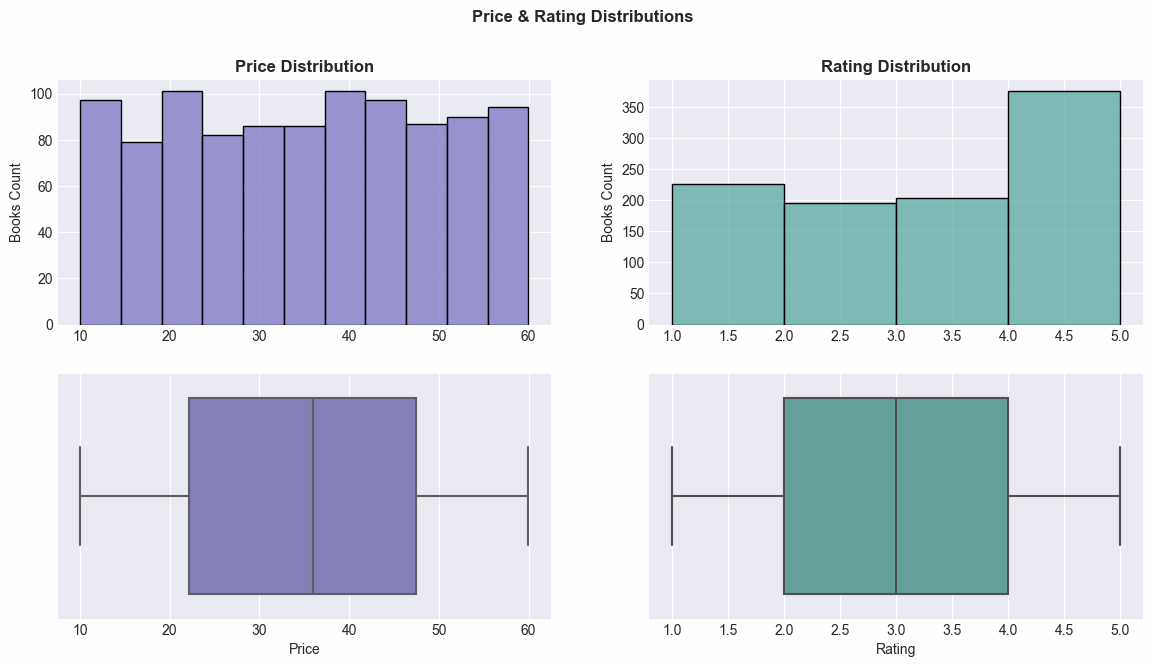

In [15]:
# plot styling
plt.style.use("../06_RESOURCES/style.mplstyle")

# create figure object and axis
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# distribution plots: price
sns.histplot(data=books, x="price", ax=ax1)
sns.boxplot(x=books["price"], ax=ax3)

# distribution plots: rating
sns.histplot(data=books, x="rating", color="#5AA9A2", bins=np.arange(1, 6, 1), ax=ax2)
sns.boxplot(x=books["rating"], color="#5AA9A2", ax=ax4)

# remove spines
sns.despine()

# plot customization : price distribution
ax1.set_title("Price Distribution", fontweight="bold")
ax1.set_ylabel("Books Count")
ax1.set_xlabel("")
ax3.set_xlabel("Price")

# plot customization : rating distribution
ax2.set_title("Rating Distribution", fontweight="bold")
ax2.set_ylabel("Books Count")
ax2.set_xlabel("")
ax4.set_xlabel("Rating")

# add figure title
fig.suptitle(f'Price & Rating Distributions', fontweight="bold")

# show plot
plt.show()

💡 **Insight:**

The uniform distribution for both `price` and `rating` suggests that there are no significant skews or outliers in the data. 

This means that the majority of the values in the data are evenly distributed across the range, without any values that are significantly higher or lower. As a result, the mean and median values are likely to be close together, indicating a balanced distribution of values.

#### Text Data Summary Statisticts

In this we will be finding the following summary statistics for the text fields present in the dataframe. We'll get the following details for the text fields present in the dataframe:
- `count`: Count of non-null values
- `unique_values`: Count of unique values
- `longest_value`: The longest (length) value in the data
- `shortest_value`: The shortest (length) value in the data
- `max_value_count`: Number of values equal to the maximum length value
- `min_value_count`: Number of values equal to the minimum length value

We'll leverage the `describe_object_fields()` function that uses various `pandas` function to calculate all of these.

In [16]:
describe_object_fields(df=books)

,count,unique_values,longest_values,average_lenght_value,shortest_value,max_value_count,min_value_count
column,,,,,,,
title,1000,999,204,39.097,2,1,1
genre,1000,50,18,9.516,3,26,8


💡 **Insight:**

It is interesting to see that the shortest book name in out dataset has just $2$ characters and the longest book title has $204$ characters. The genre names are generally short, so there isn't a surprise.
However, let's see the books with longest and shortest book titles

In [17]:
# create filter mask
filter_mask = (books['title'].str.len() == 204) | (books['title'].str.len() == 2)

# filter dataframe
books[filter_mask]

,title,genre,price,rating
168,"At The Existentialist Café: Freedom, Being, an...",Philosophy,29.93,5
880,It,Horror,25.01,3


Here is the link to view the books in the website:

- [At The Existentialist Café: Freedom, Being, and apricot cocktails with: Jean-Paul Sartre, Simone de Beauvoir, Albert Camus, Martin Heidegger, Edmund Husserl, Karl Jaspers, Maurice Merleau-Ponty and others](https://books.toscrape.com/catalogue/at-the-existentialist-cafe-freedom-being-and-apricot-cocktails-with-jean-paul-sartre-simone-de-beauvoir-albert-camus-martin-heidegger-edmund-husserl-karl-jaspers-maurice-merleau-ponty-and-others_459/index.html)
- [IT](https://books.toscrape.com/catalogue/it_330/index.html)

### Data Relationships Analysis

In this section, we will examine the relationships between different columns in the dataset. This can include identifying correlation, co-occurrence, or mutual information. 

The goal of this analysis is to understand how the columns in the dataset are related to each other and to identify any potential issues that need to be addressed before further analysis. We can leverage visualization tools such as heatmaps, scatter plots and correlation matrix to achieve this.

Given that there are only two numerical fields, plotting a correlation matrix would not provide much insight. Instead, we will conduct the following analysis:

- **Correlation Analysis**: To examine the linear relationship between the two fields.
- **Bivariate Analysis**: To study the relationship between each pair of variables in the dataset and to identify any significant patterns or trends between them.

#### Correlation Analysis

In this section, we will be performing a correlation analysis to find the relationship between the numerical fields in the data. We have two numerical fields in our data, i.e., `price` and `rating`.

The correlation coefficient will be represented as a value between $-1$ and $1$, where $-1$ indicates a strong negative correlation, $1$ indicates a strong positive correlation, and $0$ indicates no correlation.

In [18]:
corr_val = books["price"].corr(books["rating"])
print(f"The pearson correlation coefficient between 'price' and 'rating' is: {round(corr_val, 3):.2f}")

The pearson correlation coefficient between 'price' and 'rating' is: 0.03


💡 **Insight:**

The Pearson correlation coefficient of $0.03$ between `price` and `rating` suggests that there is a very weak correlation between the two variables. A value of $0.03$ indicates that there is a very small relationship between `price` and `rating`. This means that changes in `price` are not very strongly associated with changes in `rating`.

It's important to note that correlation does not necessarily imply causation. A weak correlation between two variables simply indicates that they tend to change together to some degree, it does not indicate that one variable causes the other. We need to visualize the data to get a better understand the relationship between the fields.


#### Bivariate Analysis

In this section, we will be creating scatter plots to visualize the relationship between different features in the dataset.

By plotting the features against one another, we can gain insight into the correlation between them and identify any patterns or trends that may exist. This can help us understand the underlying structure of the data and inform our next steps in the data analysis process. Additionally, this can also help identify any potential outliers or anomalies in the data that may require further investigation.

We only have $2$ numerical features in our dataset and earlier we have found that there is no linear relationsip between the `price` and `rating`. Let's visualize the bivariate distribution between the two

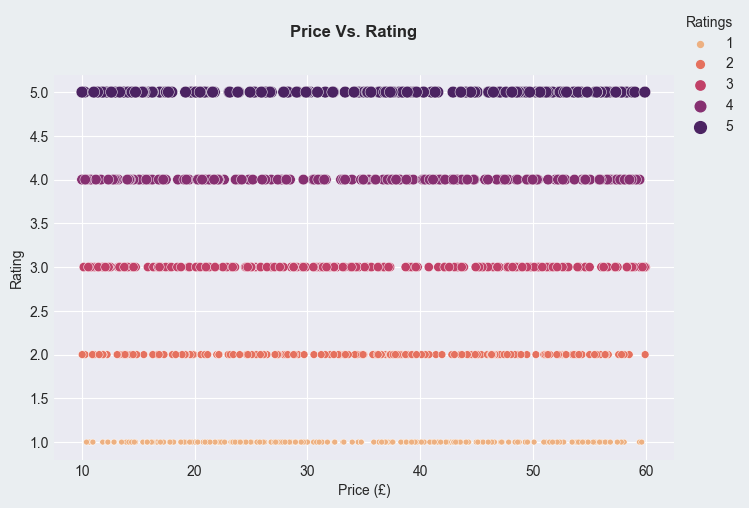

In [19]:
# create data for plot
x = books['price']
y = books['rating']

# plot styling
plt.style.use("../06_RESOURCES/style.mplstyle")

# create figure object and axis
fig = plt.figure(figsize=(8, 5), facecolor='#EAEEF1')
ax = fig.add_subplot()

# create plot
sns.scatterplot(x=x, y=y, size=round(y), hue=round(y), palette="flare", ax=ax)

# legend outside of plot
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 1), title="Ratings")

# plot customization
fig.suptitle("Price Vs. Rating", fontweight="bold")
ax.set_xlabel("Price (£)")
ax.set_ylabel("Rating")

# view the plot
plt.show()

💡 **Insight:**

From the **Data Distribution** analysis, we have seen that that the books are uniformly distributed across the ratings and the correlation coefficient between `price` and `rating` is $0.3$, thus, having such a scatterplot is not a surprise.

The plot shows that the books are uniformly distributed (almost) in each rating across the price range. That is pretty interesting.

## Data Visualization

Data visualization is a crucial aspect of data analysis as it helps to communicate insights and patterns in the data effectively. By using charts, plots, and other visual aids, we can present the results of our analysis in a clear and concise manner, making it easier for others to understand and act upon.

In this section, we'll dive into the analysis of various aspects of the book data to gain insights and understand the trends. We'll perform the following analyses:

- **Average Price by Genre**: This analysis will give us an understanding of the average price of books across different genres.
- **Average Price by Rating**: This analysis will help us understand how the average price of books varies with their ratings.
- **Books Count by Genre**: This analysis will give us a count of the number of books in each genre, allowing us to see the distribution of books across genres.
- **Books Count by Rating**: This analysis will help us understand the distribution of books based on their ratings.
- **Average Price vs. Average Rating by Genre**: This analysis will help us understand how the average price and average rating of books vary across different genres.

With the help of such analysis; we'll be able to see which genres tend to be more expensive and which ones tend to have higher ratings. This information can be used to make informed decisions regarding purchasing and stocking books, as well as identifying trends and patterns in the book industry.

Overall, the results of these analyses will give us a better understanding of the book market, allowing us to make informed decisions and stay ahead of the competition.

### Average Price by Genre

This analysis will help us understand the cost structure of books across various genres. We will look at the average price of books for each genre, and determine which genres have the highest and lowest average prices. 

By comparing the average prices of the various genres, we will be able to identify the genres that are more expensive or less expensive compared to the overall average price of all $50$ genres. Additionally, we will count the number of genres that have average prices below or above the overall average price. 

This information will give us valuable insights into the market, enabling us to determine the most profitable genres and where to focus our efforts. By understanding the cost structure of books across various genres, we can make informed decisions about which genres to invest in, and how to price our products to maximize profits.

In [20]:
# construct the dataframe
avg_price_by_genre = (
    books[['genre', 'price']].groupby('genre').mean()
    .reset_index()
    .sort_values(by='price', ascending=False)
)

# view glimpse of the dataframe
avg_price_by_genre.head()

,genre,price
45,Suspense,58.33000
29,Novels,54.81000
34,Politics,53.61333
19,Health,51.45250
27,New Adult,46.38333


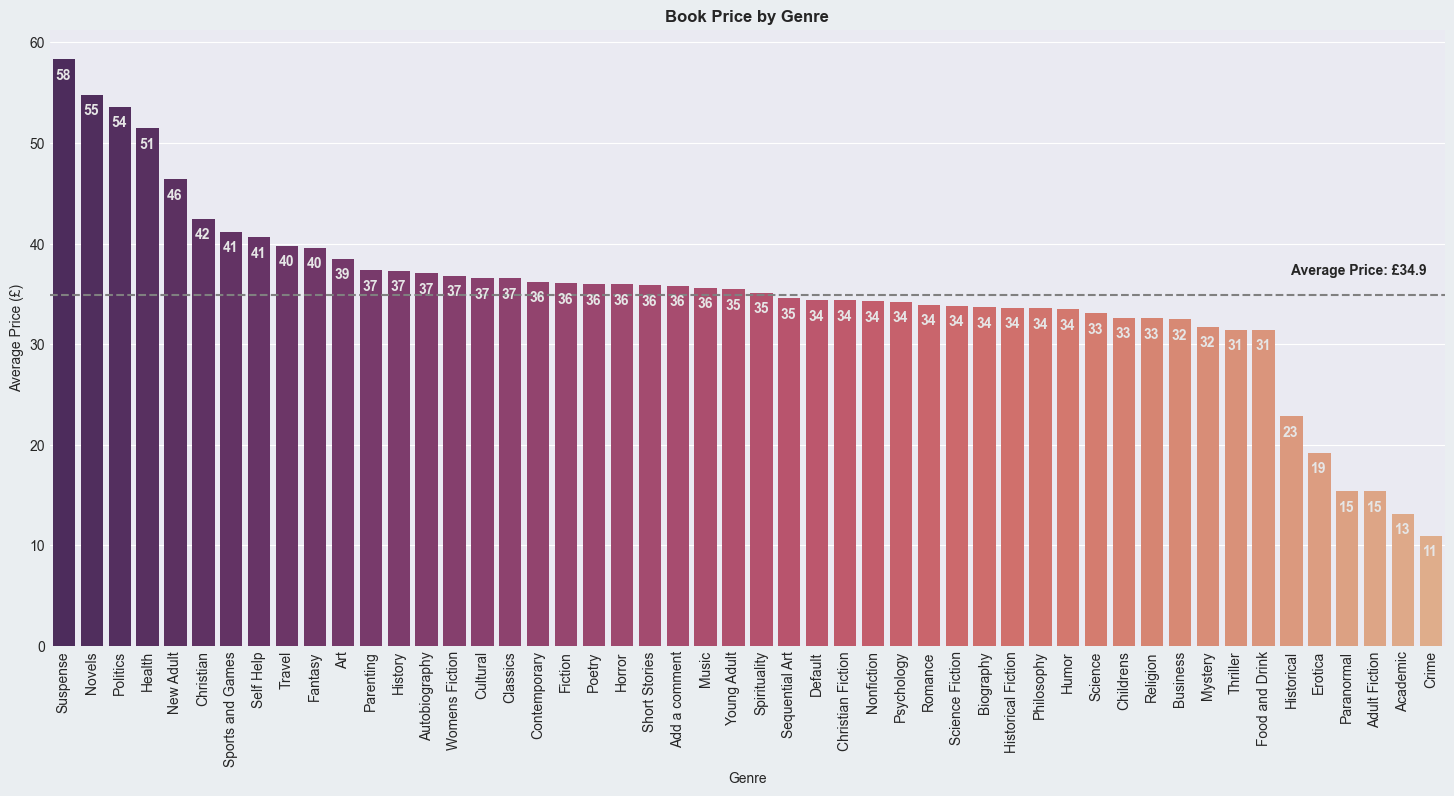

In [21]:
# create data for plot
x = avg_price_by_genre['genre']
y = avg_price_by_genre['price']
avg_price = y.mean()

# plot styling
plt.style.use("../06_RESOURCES/style.mplstyle")

# create figure object and axis
fig = plt.figure(figsize=(18, 8), facecolor='#EAEEF1')
ax = fig.add_subplot()

# plotting
sns.barplot(x=x, y=y, 
            estimator='mean', 
            errorbar=None,
            palette='flare_r',
            ax = ax)

# add data labeks
for i, v in enumerate(y):
    ax.text(i-0.3, v-2, f"{round(v, 2):.0f}", fontweight="bold", color="#e6e6e6")

# average line 
plt.axhline(y = avg_price, color = 'grey', linestyle = '--')

# add average label value
ax.text(len(x)-6, avg_price+2, f"Average Price: £{round(avg_price, 2):.1f}", fontweight="bold")

# remove spines
sns.despine()

# rotate X-axis
plt.xticks(rotation=90)

# plot customization
ax.set_title("Book Price by Genre", fontweight="bold")
ax.set_xlabel("Genre")
ax.set_ylabel("Average Price (£)")

# view the plot
plt.show()

Although we can see the top and bottom $5$ genres by price from the above chart, but, let's see them in the form of a table:

In [22]:
# top 5 genres by price
(
    avg_price_by_genre.nlargest(5, "price")
    .rename(columns={"genre": "Genre", "price": "Price"})
    .style.background_gradient(axis=0, cmap="flare")
    .format('£ {:.1f}', precision=1, subset=["Price"])
)

,Genre,Price
45,Suspense,£ 58.3
29,Novels,£ 54.8
34,Politics,£ 53.6
19,Health,£ 51.5
27,New Adult,£ 46.4


In [23]:
# bottom 5 genres by price

(
    avg_price_by_genre.nsmallest(5, "price")
    .rename(columns={"genre": "Genre", "price": "Price"})
    .style.background_gradient(axis=0, cmap="flare")
    .format('£ {:.1f}', precision=1, subset=["Price"])
)

,Genre,Price
12,Crime,£ 11.0
0,Academic,£ 13.1
2,Adult Fiction,£ 15.4
30,Paranormal,£ 15.4
15,Erotica,£ 19.2


💡 **Insight:**

We can see that the **Suspense** genre is the most expensive genre followed by **Novel**, **Politics**, **Health** and **New Adult**. Similarly, the least expensive genre is **Crime** followed by **Academic**, **Adult Fiction**, **Paranormal** and **Erotica**.

Now, lets visualize how many books are above or, below the overall average, i.e., £$34.9$.

In [24]:
# overall average
overall_avg = avg_price_by_genre['price'].mean()

# filters
abv_overall_avg = avg_price_by_genre['price'] > overall_avg
below_overall_avg = avg_price_by_genre['price'] < overall_avg
equals_overall_avg = avg_price_by_genre['price'] == overall_avg

# filtering dataframe
genre_count_abv_average = int(avg_price_by_genre[abv_overall_avg].set_index("genre").count())
genre_count_below_average = int(avg_price_by_genre[below_overall_avg].set_index("genre").count())
genre_count_equals_average = int(avg_price_by_genre[equals_overall_avg].set_index("genre").count())

# results
print(f"Genres with average price above the overall average price (£{round(overall_avg):.1f}): {genre_count_abv_average} ({(genre_count_abv_average/50):.0%})")
print(f"Genres with average price below the overall average price (£{round(overall_avg):.1f}): {genre_count_below_average} ({(genre_count_below_average/50):.0%})")
print(f"Genres with average price equals the overall average price (£{round(overall_avg):.1f}): {genre_count_equals_average} ({(genre_count_equals_average/50):.0%})")

Genres with average price above the overall average price (£35.0): 26 (52%)
Genres with average price below the overall average price (£35.0): 24 (48%)
Genres with average price equals the overall average price (£35.0): 0 (0%)


💡 **Insight:**

This data shows that half of the genres ($52\%$) have an average price above the overall average of £$35.0$, while the other half ($48\%$) have an average price below the overall average. 

This distribution of average prices among the genres could suggest that some genres are more expensive than others, and it might be valuable to explore why this is the case. Further analysis could reveal any patterns or trends that exist, which could inform business decisions about which genres to prioritize or adjustments to make in pricing strategies.

### Average Price by Rating

With this analysis, we aim to explore the relationship between the average price of books by ratings. 

The outcome of this analysis will provide us with insights into how the average price of books varies based on their ratings. We will also investigate which ratings have an average price that is above or below the overall average, allowing us to understand which ratings may be more or less expensive in comparison to others. 

This information can be useful for identifying trends and patterns in the market, which can inform pricing strategies and guide business decisions.

In [25]:
# construct the dataframe
avg_price_by_rating = (
    books[['rating', 'price']].groupby('rating').mean()
    .reset_index()
    .sort_values(by='rating')
)

# view glimpse of the dataframe
avg_price_by_rating

,rating,price
0,1,34.56119
1,2,34.81092
2,3,34.69202
3,4,36.09330
4,5,35.37449


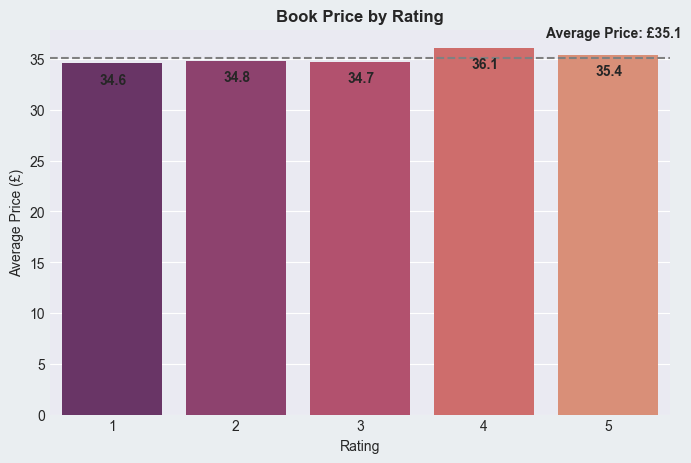

In [26]:
# create data for plot
x = avg_price_by_rating['rating']
y = avg_price_by_rating['price']
avg_price = y.mean()

# plot styling
plt.style.use("../06_RESOURCES/style.mplstyle")

# create figure object and axis
fig = plt.figure(figsize=(8, 5), facecolor='#EAEEF1')
ax = fig.add_subplot()

# plotting
sns.barplot(x=x, y=y, 
            estimator='mean', 
            errorbar=None,
            palette='flare_r',
            ax = ax)

# add data labeks
for i, v in enumerate(y):
    ax.text(i-0.1, v-2, f"{round(v, 2):.1f}", fontweight="bold")

# average line 
plt.axhline(y = avg_price, color = 'grey', linestyle = '--')

# add average label value
ax.text(3.5, avg_price+2, f"Average Price: £{round(avg_price, 2):.1f}", fontweight="bold")

# remove spines
sns.despine()

# plot customization
ax.set_title("Book Price by Rating", fontweight="bold")
ax.set_xlabel("Rating")
ax.set_ylabel("Average Price (£)")

# view the plot
plt.show()

💡 **Insight:**

This data indicates that the difference in average prices across ratings is relatively small, with only two ratings, $4$ and $5$, having an average price that is above the overall average. The average price of books with a $4$ rating is $36.1$, while the average price of books with a 5 rating is $35.4$. 

This could suggest that books with higher ratings tend to be slightly more expensive than those with lower ratings

### Books Count by Genre

With this analysis, we aim to understand the distribution of books across genres. We will determine the number of books in each genre and visualize the distribution to get a better understanding of the market. 

Additionally, we will identify the genres with the top-5 and bottom-10 count of books, and will also determine how many genres have a count of books that is above or below the overall average of book count by genre. 

This information can be useful in identifying popular genres, potential areas for growth, and potential gaps in the market. Understanding the distribution of books across genres can inform business decisions about which genres to focus on and where to allocate resources. 

It can also provide valuable insights into consumer preferences, helping companies to better target their marketing efforts and increase sales.

In [27]:
# construct the dataframe
books_by_genre = books["genre"].value_counts()

# view glimpse of the dataframe
books_by_genre.head()

Default           152
Nonfiction        110
Sequential Art     75
Add a comment      67
Fiction            65
Name: genre, dtype: int64

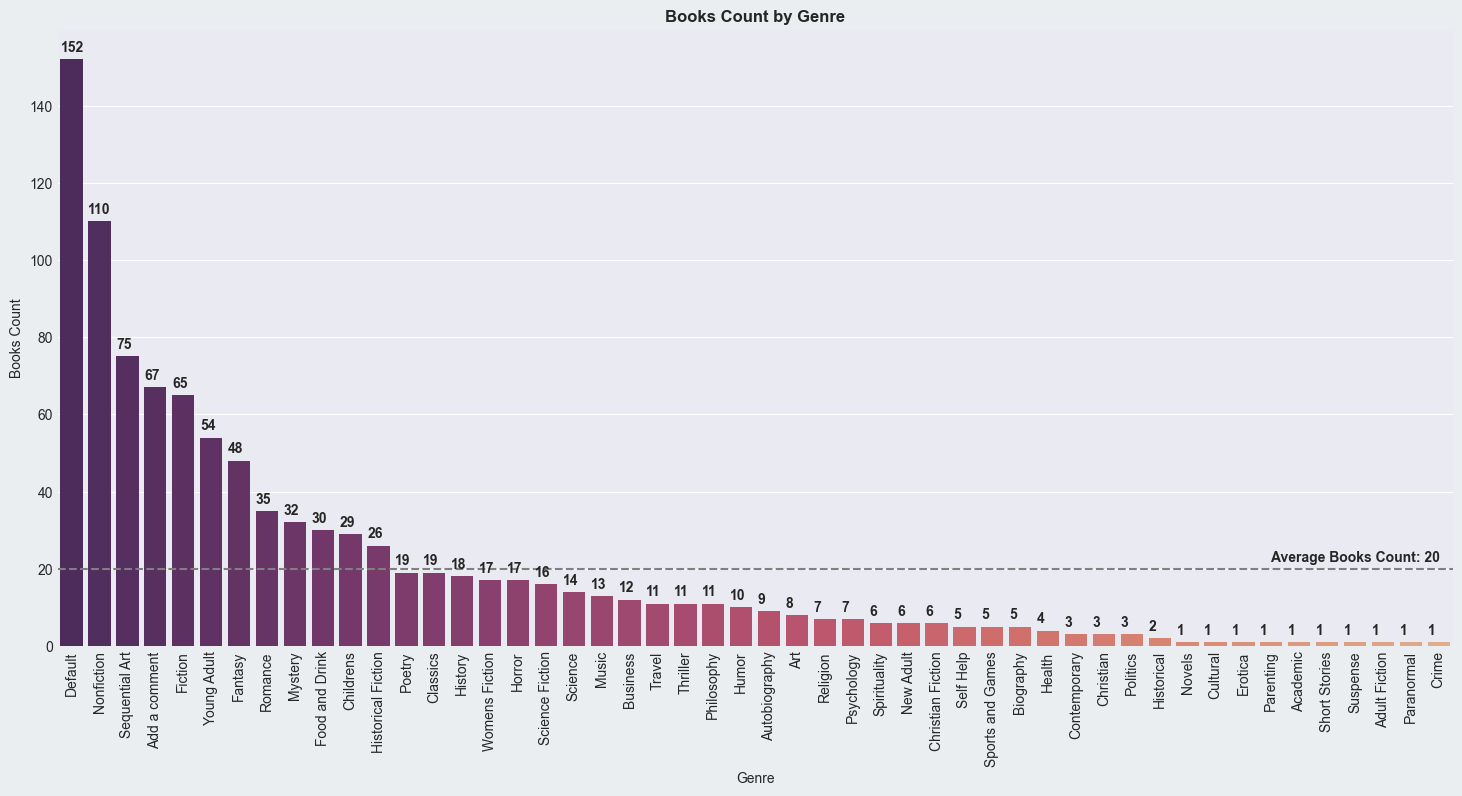

In [28]:
# create data for plot
x = books_by_genre.index
y = books_by_genre.values
avg_books_count = y.mean()

# plot styling
plt.style.use("../06_RESOURCES/style.mplstyle")

# create figure object and axis
fig = plt.figure(figsize=(18, 8), facecolor='#EAEEF1')
ax = fig.add_subplot()

# plotting
sns.barplot(x=x, y=y, 
            estimator='mean', 
            errorbar=None,
            palette='flare_r',
            ax = ax)

# average line 
plt.axhline(y = avg_books_count, color = 'grey', linestyle = '--')

# add data labeks
for i, v in enumerate(y):
    ax.text(i-0.4, v+2, f"{v:,}", fontweight="bold")
    
# add average label value
ax.text(len(x)-7, avg_books_count+2, f"Average Books Count: {avg_books_count:.0f}", fontweight="bold")

# remove spines
sns.despine()

# rotate X-axis
plt.xticks(rotation=90)

# plot customization
ax.set_title("Books Count by Genre", fontweight="bold")
ax.set_xlabel("Genre")
ax.set_ylabel("Books Count")

# view the plot
plt.show()

Although we can see the top and bottom $5$ genres by their books count from the above chart, but, let's see them in the form of a table:

In [29]:
# top 5 genres by books count
(
    pd.DataFrame(books_by_genre).reset_index()
    .rename(columns={"index":"Genre", "genre": "Books Count"})
    .nlargest(5, "Books Count")
    .style.background_gradient(axis=0, cmap="flare")
    .format('{:.0f}', precision=1, subset=["Books Count"])
    .applymap(lambda x: "font-weight: bold", subset=["Books Count"])
)

,Genre,Books Count
0,Default,152
1,Nonfiction,110
2,Sequential Art,75
3,Add a comment,67
4,Fiction,65


In [30]:
# bottom 10 genres by books count
(
    pd.DataFrame(books_by_genre).reset_index()
    .rename(columns={"index":"Genre", "genre": "Books Count"})
    .nsmallest(10, "Books Count")
    .style.background_gradient(axis=0, cmap="flare")
    .format('{:.0f}', precision=1, subset=["Books Count"])
    .applymap(lambda x: "font-weight: bold", subset=["Books Count"])
)

,Genre,Books Count
40,Novels,1
41,Cultural,1
42,Erotica,1
43,Parenting,1
44,Academic,1
45,Short Stories,1
46,Suspense,1
47,Adult Fiction,1
48,Paranormal,1
49,Crime,1


💡 **Insight:**

This analysis highlights the distribution of books across different genres, as well as the relationship between the number of books in a genre and the average price of books in that genre.

We can see that the genre with the most books is **"Default"**, followed by **"Non-fiction"**, **"Sequential Art"**,  **"Add a Comment"** and **"Fiction"**.

On the other hand, we can see that there are ten genres with only $1$ book each. These genres, which include **"Crime"**, **"Academic"**, **"Adult Fiction"**, **"Paranormal"** and **"Erotica"** are also among the bottom-5 genres in terms of average price.

This correlation suggests that genres with fewer books tend to have a lower average price. This information provides a clearer understanding of why some genres have lower average prices, and can inform business decisions about which genres to focus on, and where to allocate resources.

Now, lets visualize how many books are above or, below the overall average of book count, i.e., $20$.

In [31]:
# overall average
overall_avg = books_by_genre.mean()

# filters
abv_overall_avg = books_by_genre > overall_avg
below_overall_avg = books_by_genre < overall_avg
equals_overall_avg = books_by_genre == overall_avg

# filtering dataframe
books_count_abv_average = abv_overall_avg.sum()
books_count_below_average = below_overall_avg.sum()
books_count_equals_average = equals_overall_avg.sum()

# results
print(f"Genres having number of books above the overall average ({overall_avg:.0f}): {books_count_abv_average} ({(books_count_abv_average/50):.0%})")
print(f"Genres having number of books below the overall average ({overall_avg:.0f}): {books_count_below_average} ({(books_count_below_average/50):.0%})")
print(f"Genres having number of books equals the overall average ({overall_avg:.0f}): {books_count_equals_average} ({(books_count_equals_average/50):.0%})")

Genres having number of books above the overall average (20): 12 (24%)
Genres having number of books below the overall average (20): 38 (76%)
Genres having number of books equals the overall average (20): 0 (0%)


💡 **Insight:**

It can be observed that the majority of genres ($76\%$) have fewer than $20$ books. Only $12$ genres have a higher number of books, with over $20$ books each. 

This disparity in book numbers among genres suggests that some genres are more popular or in-demand than others. The large number of genres with fewer books may indicate that these are niche or specialized genres that appeal to a smaller audience. 

On the other hand, the $12$ genres with a higher number of books likely have a broader appeal and are more mainstream. Further analysis of the characteristics of these genres may provide valuable insights into reader preferences and the publishing industry as a whole.

### Book Counts by Rating

With this analysis, we aim to understand the distribution of books based on their ratings. We will examine the number of books for each rating, and visualize the distribution to get a better understanding of the market. 

Additionally, we will identify the ratings with the highest and lowest count of books, and determine how many ratings have a count of books that is above or below the overall average of number of books by rating. 

This information can be useful in understanding consumer preferences and determining which ratings are most popular among readers. It can also provide valuable insights into the market, helping companies to better target their marketing efforts and increase sales. By understanding the distribution of books based on their ratings, we can make informed decisions about which ratings to focus on, and where to allocate resources.

In [32]:
# construct the dataframe
books_by_rating = books["rating"].value_counts().sort_index()

# view glimpse of the dataframe
books_by_rating

1    226
2    196
3    203
4    179
5    196
Name: rating, dtype: int64

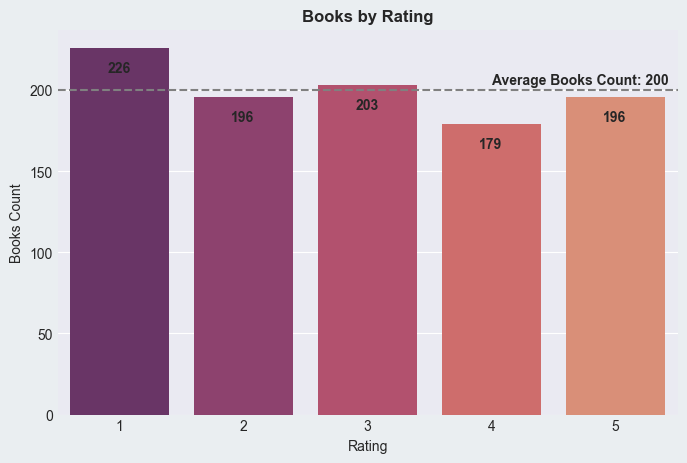

In [33]:
# create x and height value for barplot
x = books_by_rating.index
y = books_by_rating.values
avg_books_count = y.mean()

# plot styling
plt.style.use("../06_RESOURCES/style.mplstyle")

# create figure object and axis
fig = plt.figure(figsize=(8, 5), facecolor='#EAEEF1')
ax = fig.add_subplot()

# plotting
sns.barplot(x=x, y=y, 
            estimator='mean', 
            errorbar=None,
            palette='flare_r',
            ax = ax)

# add mean line
plt.axhline(y = avg_books_count, color='grey', linestyle = '--')

# add data labeks
for i, v in enumerate(y):
    ax.text(i-0.1, v-15, f"{v:,}", fontweight="bold")
    
# add average label value
ax.text(3, avg_books_count+3.5, f"Average Books Count: {avg_books_count:.0f}", fontweight="bold")

# remove spines
sns.despine()

# plot customization
ax.set_title("Books by Rating", fontweight="bold")
ax.set_xlabel("Rating")
ax.set_ylabel("Books Count")

# view the plot
plt.show()

💡 **Insight:**

The average number of books per rating is $200$, and the number of books with 1-star ratings is $226$, while $203$ books have a 3-star rating. 

An interesting observation is that books with a 4-star and 5-star rating surpass the overall average when analyzed by average price. However, these ratings have the lowest number of books, with $179$ books rated 4-star and 196 books rated 5-star. 

This data highlights a trend where the lower-rated books are more common, while higher-rated books are more scarce. Additionally, the low number of books with 4-star and 5-star ratings may indicate that these ratings are reserved for exceptional works that stand out from the rest.

### Average Price vs. Average Rating by Genre

This analysis will give us an in-depth understanding of how the average price and average rating of books are related to the genre they belong to. 

To better visualize the relationships between the variables, we will create a scatterplot and a table with a background gradient that indicates the highest to lowest average price or rating. This visual representation will allow us to quickly identify the genres with the highest and lowest average price and rating. 

Moreover, we will highlight the genres that fall at the extreme ends, such as those that have a low average price but high rating, or a low average rating with a low price, etc.

This analysis will help us understand the correlations between the variables and make informed decisions about which genres to focus on for maximum profitability. By analyzing the average price and average rating of books across different genres, we can gain valuable insights into the book market and tailor our business strategies accordingly.

In [34]:
# construct the dataframe
mean_price_rating_by_genre = (
    books.drop(columns="title")
    .groupby("genre")
    .mean()
    .reset_index()
)

# view glimpse of the dataframe
mean_price_rating_by_genre.head()

,genre,price,rating
0,Academic,13.12000,2.00000
1,Add a comment,35.79642,2.76119
2,Adult Fiction,15.36000,5.00000
3,Art,38.52000,3.62500
4,Autobiography,37.05333,3.00000


Let's format the table with styling options available in `pandas` to have a better view of average price and average ratings of books by genre 

In [35]:
# view data in customized tabular form

(
    mean_price_rating_by_genre.rename(columns={"rating": "Average Rating", "price": "Average Price", "genre": "Genre"})
    .style
    .background_gradient(axis=0, cmap="flare")
    .format('£ {:.1f}', precision=1, subset=["Average Price"])
    .format('{:.1f}', precision=1, subset=["Average Rating"])
)

,Genre,Average Price,Average Rating
0,Academic,£ 13.1,2.0
1,Add a comment,£ 35.8,2.8
2,Adult Fiction,£ 15.4,5.0
3,Art,£ 38.5,3.6
4,Autobiography,£ 37.1,3.0
5,Biography,£ 33.7,2.2
6,Business,£ 32.5,2.9
7,Childrens,£ 32.6,2.6
8,Christian,£ 42.5,2.7
9,Christian Fiction,£ 34.4,4.2


Now, we can plot the data in the form of a scatterplot to have a better view of the distribution of average price and rating of books across the genres:

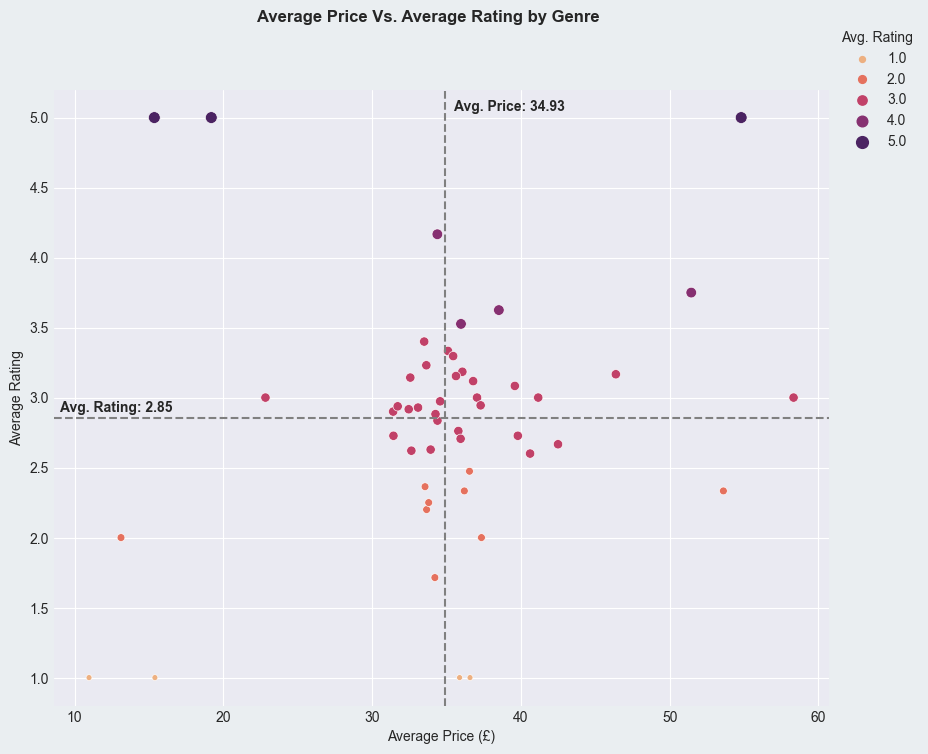

In [36]:
# create data for plot
x = mean_price_rating_by_genre["price"]
y = mean_price_rating_by_genre["rating"]
avg_x = x.mean()
avg_y = y.mean()

# custom bins for ratings
bins = pd.cut(y, [0, 1, 2, 3, 4, 5])

# plot styling
plt.style.use("../06_RESOURCES/style.mplstyle")

# create figure object and axis
fig = plt.figure(figsize=(10, 8), facecolor='#EAEEF1')
ax = fig.add_subplot()

# plot
sns.scatterplot(x=x, y=y, size=round(y), hue=round(y), palette="flare", ax=ax)

# plotting average lines
plt.axhline(y = avg_y, color = 'grey', linestyle = '--')
plt.axvline(x = avg_x, color = 'grey', linestyle = '--')

# add avergae texts
ax.text(9, round(avg_y)-0.1, f"Avg. Rating: {avg_y:.2f}", fontweight="bold")
ax.text(round(avg_x)+0.5, 5.05, f"Avg. Price: {avg_x:.2f}", fontweight="bold")

# remove spines
sns.despine()

# legend outside of plot
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 1), title="Avg. Rating")

# plot customization
fig.suptitle("Average Price Vs. Average Rating by Genre", fontweight="bold")
ax.set_xlabel("Average Price (£)")
ax.set_ylabel("Average Rating")

# view the plot
plt.show()

💡 **Insight:**

The comparison between the table view and scatter plot view reveals that most genres cluster around the mean, meaning they have an average price range of £$30$-£$40$ and an average rating between $2.5$-$3.5$. Some genres, however, are outliers and differ from the norm:

- **Erotica** and **Adult Fiction** have a high average rating and low average price,
- **Novels** have a high average price and high average rating,
- **Crime** and **Paranormal** have a low average price and low average rating.

There are no genres that have a low average rating and high average price. 

> It is important to note that the outliers in these genres have only one book each, making it difficult to draw solid conclusions about these genres.

## Conclusion

In this data analysis project, we have gone through a series of data analysis techniques and visualizations to gain a deeper understanding of the patterns in the book market with regards to genres, ratings, prices, and more. We have analyzed individual fields and their relationships with other fields to gain a comprehensive understanding of the data and documented the insights we gained from each analysis.

Our next step would be to create an interactive data visualization using Power BI to provide a user-friendly and intuitive interface for exploring the insights from our analysis. With Power BI, we can create interactive dashboards and reports that can help us present the insights and patterns in the data in a clear and effective manner. This will allow us to present the findings in a visually appealing way, making it easier for stakeholders to understand and make informed decisions based on our analysis.

---